# Logistic Regression Assignment

- Run the below cells. If you have the data in a different directory, you'll need to change the url.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

In [2]:
# insert code
counts=df['left_company'].value_counts()
counts

No     500
Yes    500
Name: left_company, dtype: int64

<BarContainer object of 2 artists>

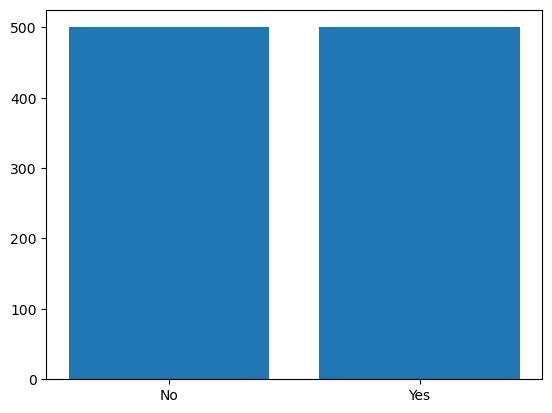

In [3]:
plt.bar(counts.index, counts.values)

* I do not have any concerns, the column left_company is evenly distributed 

Insert comments here

# Question 2
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [4]:
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


In [5]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f'Unique values in column {col}: {unique_vals}')

Unique values in column left_company: ['No' 'Yes']
Unique values in column age: [37 39 52 50 44 42 43 34 36 29 40 33 21 27 38 45 35 41 49 47 55 32 31 26
 58 57 30 25 28 54 20 24 59 48 22 60 53 51 18 46 23 56 19]
Unique values in column frequency_of_travel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique values in column department: ['Sales' 'Research & Development' 'Human Resources']
Unique values in column commuting_distance: [16  3 25  1  4 10  8 19 15  2  6  7 28 14  5 18 20 29 22 23 21 24 11 13
  9 12 26 17 27]
Unique values in column education: [4 2 3 1 5]
Unique values in column satisfaction_with_environment: [4 3 1 2]
Unique values in column gender: ['Male' 'Female']
Unique values in column seniority_level: [2 4 1 3 5]
Unique values in column position: ['Sales Executive' 'Laboratory Technician' 'Manufacturing Director'
 'Healthcare Representative' 'Manager' 'Research Scientist'
 'Research Director' 'Sales Representative' 'Human Resources']
Unique values in column satis

In [6]:
df.columns

Index(['left_company', 'age', 'frequency_of_travel', 'department',
       'commuting_distance', 'education', 'satisfaction_with_environment',
       'gender', 'seniority_level', 'position', 'satisfaction_with_job',
       'married_or_single', 'last_raise_pct', 'last_performance_rating',
       'total_years_working', 'years_at_company', 'years_in_current_job',
       'years_since_last_promotion', 'years_with_current_supervisor'],
      dtype='object')

In [7]:
numerical_features = []
categorical_features = []
for i in df:
    if i in [ 'frequency_of_travel', 'department','gender','position','satisfaction_with_job','married_or_single','satisfaction_with_environment']:
        categorical_features.append(i)
    else:
        numerical_features.append(i)
numerical_features.remove('left_company')
numerical_features

['age',
 'commuting_distance',
 'education',
 'seniority_level',
 'last_raise_pct',
 'last_performance_rating',
 'total_years_working',
 'years_at_company',
 'years_in_current_job',
 'years_since_last_promotion',
 'years_with_current_supervisor']

In [8]:
categorical_features

['frequency_of_travel',
 'department',
 'satisfaction_with_environment',
 'gender',
 'position',
 'satisfaction_with_job',
 'married_or_single']

### All the above columns have limited and repeated values and are category based, so I grouped them as categorical features

# Question 3
- Determine if any numerical variables risk multicolinearity.  
- Remove those variables (if any) from your numerical_vars list.  
- Why did you or did not remove any?

<AxesSubplot:>

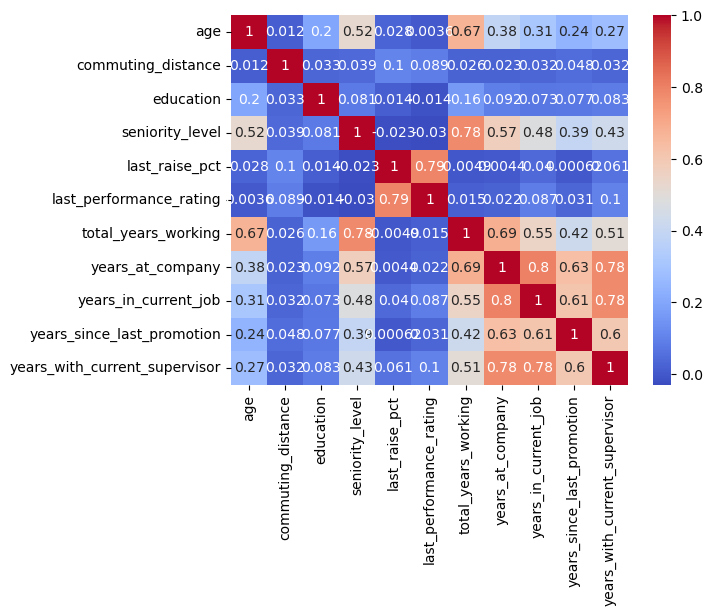

In [9]:
import seaborn as sns

corr_matrix = df[numerical_features].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

#### As we can observe from the above correlation heat map, columns 'years_in_current_job', 'years_with_current_supervisor' have most high positives in corr, so I have removed them from numerical and put them in categorical

In [10]:
numerical_features = []
categorical_features = []
for i in df:
    if i in ['frequency_of_travel', 'department','gender','position','satisfaction_with_job','married_or_single','satisfaction_with_environment']:
        categorical_features.append(i)
    else:
        numerical_features.append(i)
numerical_features.remove('left_company')
numerical_features.remove('years_in_current_job')
numerical_features.remove('years_with_current_supervisor')

<AxesSubplot:>

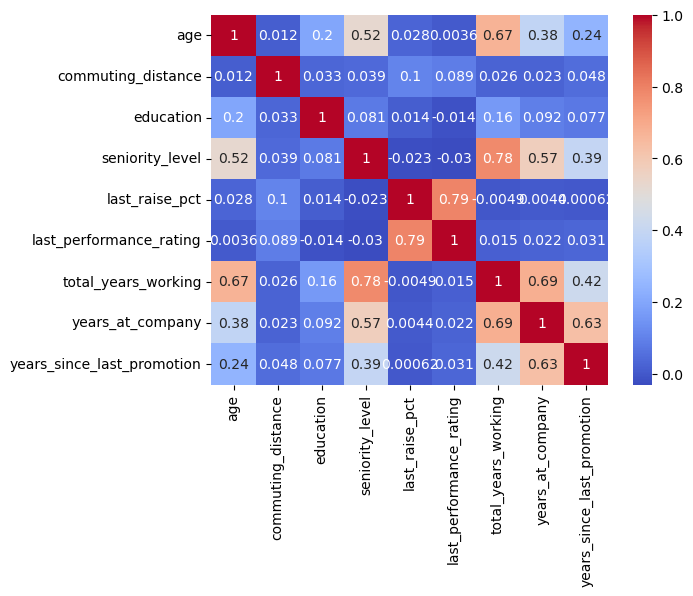

In [11]:
corr_matrix = df[numerical_features].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [12]:
from sklearn.model_selection import train_test_split

features = [x for x in df.columns if x != 'left_company' and x != 'years_in_current_job' and x != 'years_with_current_supervisor']

X = df[features]
y = df['left_company']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)
print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')


Records in training data: 800
Records in test data: 200

Features:
age
frequency_of_travel
department
commuting_distance
education
satisfaction_with_environment
gender
seniority_level
position
satisfaction_with_job
married_or_single
last_raise_pct
last_performance_rating
total_years_working
years_at_company
years_since_last_promotion


# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

In [14]:
cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

In [15]:
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numerical_features),
                                                      ('create_dummies', cat_pipeline, categorical_features)])
print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['age', 'commuting_distance', 'education',
                                  'seniority_level', 'last_raise_pct',
                                  'last_performance_rating',
                                  'total_years_working', 'years_at_company',
                                  'years_since_last_promotion']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                  

In [16]:
X_train_processed = processing_pipeline.fit_transform(X_train)

# check the shape of the processed dataset
print(X_train_processed.shape)

(800, 30)


# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [17]:
from sklearn.linear_model import LogisticRegression

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), ('lm', LogisticRegression(penalty='l2'))])
modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['age', 'commuting_distance',
                                                   'education',
                                                   'seniority_level',
                                                   'last_raise_pct',
                                                   'last_performance_rating',
                                                   'total_years_working',
                                                   'years_at_company',
                               

In [18]:
y_hat_train = modeling_pipeline.predict(X_train)
y_hat_test = modeling_pipeline.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, y_hat_train)
test_acc = accuracy_score(y_test, y_hat_test)

print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)

Training accuracy: 0.74625
Test accuracy: 0.68


#### If the training accuracy is significantly higher than the test accuracy, it could indicate that the model has memorized the training data and is not generalizing well to new, unseen data. This is a sign of overfitting.

# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

#### In this case, the training accuracy is 0.74625 and the test accuracy is 0.68. 
#### The difference between the two is not extreme, but it is still somewhat concerning. 
#### It suggests that the model may be overfitting to some degree, and it would be worth exploring ways to reduce overfitting, 
#### such as adding regularization or simplifying the model.